# Problem Description



![Dataset variability](image-20210517-161646.png)

### Run for your life

- Run for your life is a startup tech company. Our goal is to develop a fitness software that is able to be used plug and play style into most apps and smart watches, in a Google Fit style.

- One of the main ideas behind the project is to facilitate the calorie counting and make it more precise. In order to do this you will need to build a model that use the different measurements of your phone to classify the activity the athletes are taking part on accurately.

### Plug and play

- Even though the initial focus is to get it working in as smartphone for Google Fit. We would like for it to work also in less powerful devices like smart watches.

- Since the software is meant to complement other apps the easier it is to attach to a fitness software the easier it would be to sell. Same applies to devices, the more devices is works on the easier it will be to sell.

### Sensors

![Picture title](image-20210517-143258.png)

### What are we looking for:

- We are looking for a model with incredible accuracy in as many classes as possible. We are willing to sacrifice some accuracy in exchange for classifying more classes, but never too much.
- The model should be adaptable to more devices that maybe don't measure as much data as the one in our dataset so if you are able to achieve great results with less data we would be very interested in taking a look at them.
- The more lightweight the better we even accept a ‘lite’ submission for smartwatches with the main submission.
- What if we didn't need to plug this into another software? If you are able to do a precise calorie counter and deliver it with the model please do.

### The Data

The dataset is based on the 13 users who collected the data during their daily activities. The dataset includes all sensors available in phones and distinguishes five transportation modes: 
- being on a car
- on a bus
- on a train
- standing still
- walking.

You can find them here:
https://tempesta.cs.unibo.it/projects/us-tm2017/download.html

### Which one to prefer?

This is a real research problem that resulted in a publication https://arxiv.org/abs/1810.05596 
However, nothing in Machine Learning has a definitive answer. For this reason, start answering the following questions:
- What is my end goal?
- How do I want the user to interact with the final app?
- If I need to add features, is it possible to reuse the same model? How can I make it easy to add a feature without breaking everything?
- What will be my killer feature? Super accuracy? Flexibility? Speed?




In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

print('Setup Complet !')

Setup Complet !


In [ ]:
df = pd.read_csv('dataset_halfSecondWindow.csv', index_col=False)
df

,Unnamed: 0,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,0,156661,3.0,NaN,62.0,10.053802,4.328630,14.419712,2.359507,0.629076,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
1,1,156662,4.0,NaN,62.0,10.687402,6.373194,16.329818,2.912315,0.577839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
2,2,156663,5.0,NaN,62.0,11.816800,4.817410,16.854629,3.199759,0.651511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
3,3,156664,6.0,NaN,62.0,9.401312,6.124588,12.230792,1.572354,0.713226,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
4,4,156665,7.0,NaN,62.0,10.389851,5.313790,38.533453,5.426978,0.707375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,62580,82695,4066.0,NaN,51.0,10.105329,10.089159,10.135641,0.026270,0.834765,...,89.761985,89.761985,89.761985,NaN,0.00,0.00,0.00,NaN,Walking,U1
62581,62581,77608,604.0,NaN,100.0,9.544118,9.544118,9.544118,14.491194,0.965309,...,89.747010,89.747010,89.747010,NaN,1.50,1.50,1.50,NaN,Walking,U1
62582,62582,85219,1341.0,NaN,100.0,14.258467,14.258467,14.258467,0.829544,0.773370,...,89.729460,89.729460,89.729460,NaN,0.00,0.00,0.00,NaN,Walking,U1
62583,62583,69368,1186.0,NaN,90.0,10.726491,10.726491,10.726491,7.089701,0.789832,...,89.778343,89.778343,89.778343,NaN,1.00,1.00,1.00,NaN,Walking,U1


In [ ]:
df['activityrecognition#0'].isna().sum()

62585

In [ ]:
df.drop(columns=['activityrecognition#0', 'Unnamed: 0'] , inplace=True)


In [ ]:
df.columns

Index(['id', 'time', 'activityrecognition#1',
       'android.sensor.accelerometer#mean', 'android.sensor.accelerometer#min',
       'android.sensor.accelerometer#max', 'android.sensor.accelerometer#std',
       'android.sensor.game_rotation_vector#mean',
       'android.sensor.game_rotation_vector#min',
       'android.sensor.game_rotation_vector#max',
       'android.sensor.game_rotation_vector#std',
       'android.sensor.gravity#mean', 'android.sensor.gravity#min',
       'android.sensor.gravity#max', 'android.sensor.gravity#std',
       'android.sensor.gyroscope#mean', 'android.sensor.gyroscope#min',
       'android.sensor.gyroscope#max', 'android.sensor.gyroscope#std',
       'android.sensor.gyroscope_uncalibrated#mean',
       'android.sensor.gyroscope_uncalibrated#min',
       'android.sensor.gyroscope_uncalibrated#max',
       'android.sensor.gyroscope_uncalibrated#std',
       'android.sensor.light#mean', 'android.sensor.light#min',
       'android.sensor.light#max', 'android

In [ ]:
activity_speed = df

In [ ]:
df.describe()

,id,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,...,android.sensor.step_counter#max,android.sensor.step_counter#std,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std
count,62585.000000,62585.000000,62585.000000,62585.000000,62585.000000,62585.000000,62583.000000,54000.000000,54000.000000,54000.000000,...,15611.000000,887.000000,50927.000000,50927.000000,50927.000000,1474.000000,36665.000000,36665.000000,36665.000000,1691.000000
mean,111294.400256,1150.046097,88.238444,9.988878,9.445858,10.683369,0.861880,0.753394,0.751321,0.755145,...,10360.717891,0.716806,78.575667,78.575427,78.575917,0.339107,8.174253,8.174253,8.174253,0.020950
std,71786.050656,1260.411319,23.995054,1.341609,1.582800,3.271857,1.650861,0.254025,0.254559,0.254168,...,11175.968603,0.129027,14.168533,14.168911,14.168176,0.656813,11.775773,11.775773,11.775773,0.082714
min,0.000000,3.000000,3.000000,2.685121,0.337166,2.685121,0.000000,0.006633,0.006633,0.006633,...,11.000000,0.000000,0.000000,0.000000,0.000000,0.011183,0.000000,0.000000,0.000000,0.000000
25%,46429.000000,284.000000,92.000000,9.650579,9.183074,9.804583,0.038028,0.628081,0.623344,0.629259,...,1809.000000,0.707107,72.559600,72.559600,72.559600,0.263883,0.000000,0.000000,0.000000,0.000000
50%,113960.000000,691.000000,100.000000,9.842587,9.671686,10.014332,0.228934,0.832284,0.829177,0.836099,...,6096.000000,0.707107,83.926840,83.926840,83.926840,0.263883,1.700000,1.700000,1.700000,0.000000
75%,177436.000000,1488.000000,100.000000,10.113886,9.930291,10.576126,0.791687,0.963028,0.962702,0.963726,...,12995.000000,0.707107,89.746162,89.746162,89.746162,0.263883,11.000000,11.000000,11.000000,0.000000
max,229151.000000,6835.000000,100.000000,39.161016,39.161016,66.886376,30.693363,1.000000,1.000000,1.000000,...,33363.000000,1.414214,90.308734,90.308734,90.308734,5.130057,51.360060,51.360060,51.360060,0.347322


In [ ]:
df.skew()

id                                  -0.049726
time                                 1.774471
activityrecognition#1               -2.220553
android.sensor.accelerometer#mean    2.986795
android.sensor.accelerometer#min     0.668992
                                       ...   
sound#std                            6.809721
speed#mean                           1.696972
speed#min                            1.696972
speed#max                            1.696972
speed#std                            3.696872
Length: 67, dtype: float64

<Figure size 864x720 with 0 Axes>

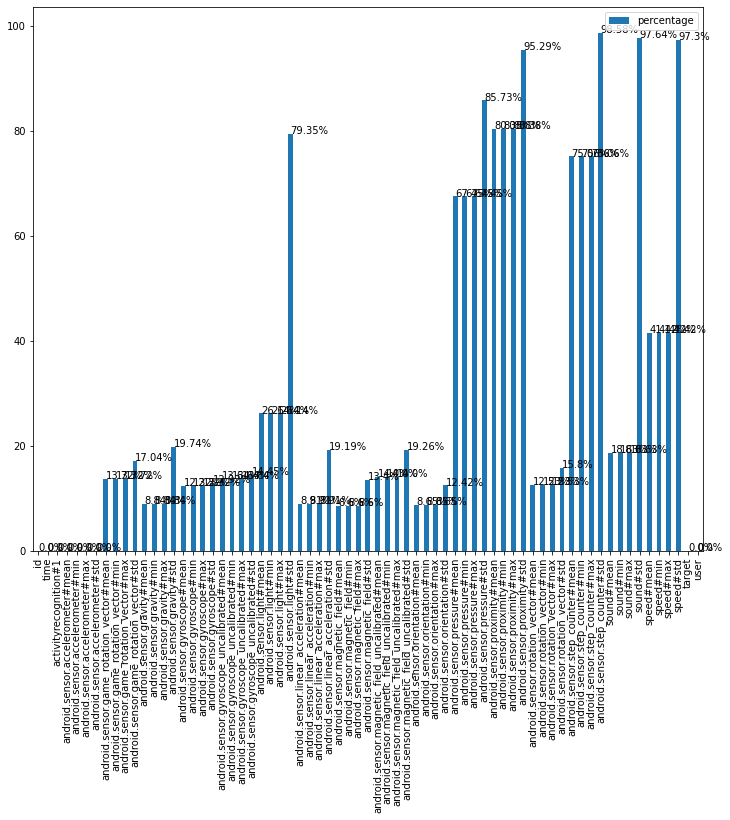

In [ ]:
missing_count = df.isna().sum()
value_count = df.isna().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage})

fig_missing = plt.figure(figsize=(12,10))
missing_barchart = missing_df.plot.bar(y='percentage', figsize=(12, 10))

for i, percentage in enumerate(missing_percentage):
    missing_barchart.text(i, percentage, str(percentage) + '%')

In [ ]:
df['target'].unique()

array(['Bus', 'Car', 'Still', 'Train', 'Walking'], dtype=object)

In [ ]:
# target replacing by 0,1,2,3,4

df['target'] = df['target'].replace({'Bus': 0, 'Car': 1, 'Still':2, 'Train':3, 'Walking':4})

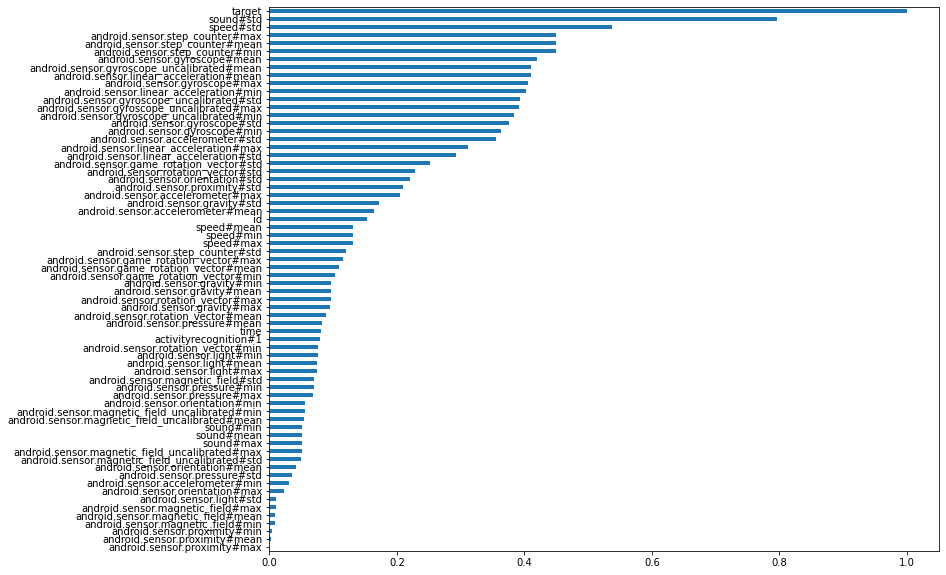

In [ ]:
fig_corr = plt.figure(figsize=(12,10))
df.corr()['target'].abs().sort_values().plot.barh()
fig_corr.show()


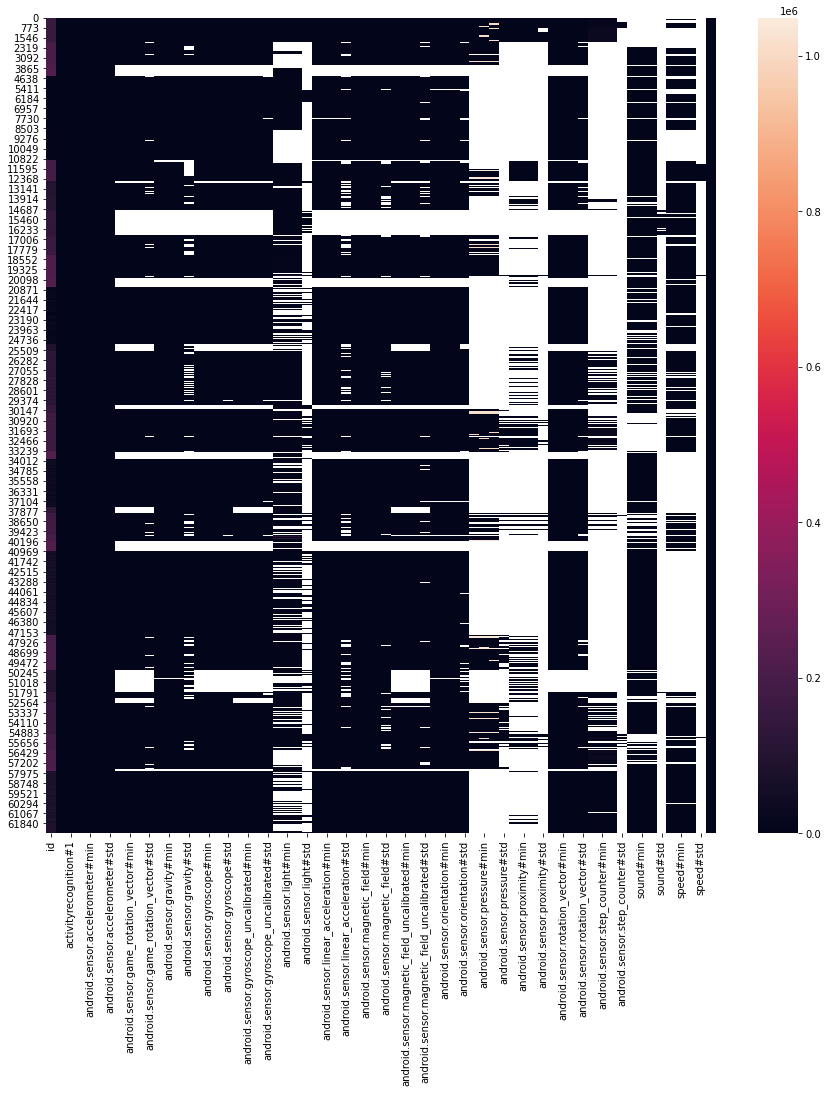

In [ ]:
# data = np.asarray(df).reshape(62585,1)
#fig = plt.figure(figsize=(15,15))
sns.heatmap(df.drop(columns='user'))
fig.show()

In [ ]:
df.dtypes

id                                     int64
time                                 float64
activityrecognition#1                float64
android.sensor.accelerometer#mean    float64
android.sensor.accelerometer#min     float64
                                      ...   
speed#min                            float64
speed#max                            float64
speed#std                            float64
target                                 int64
user                                  object
Length: 69, dtype: object

<AxesSubplot:>

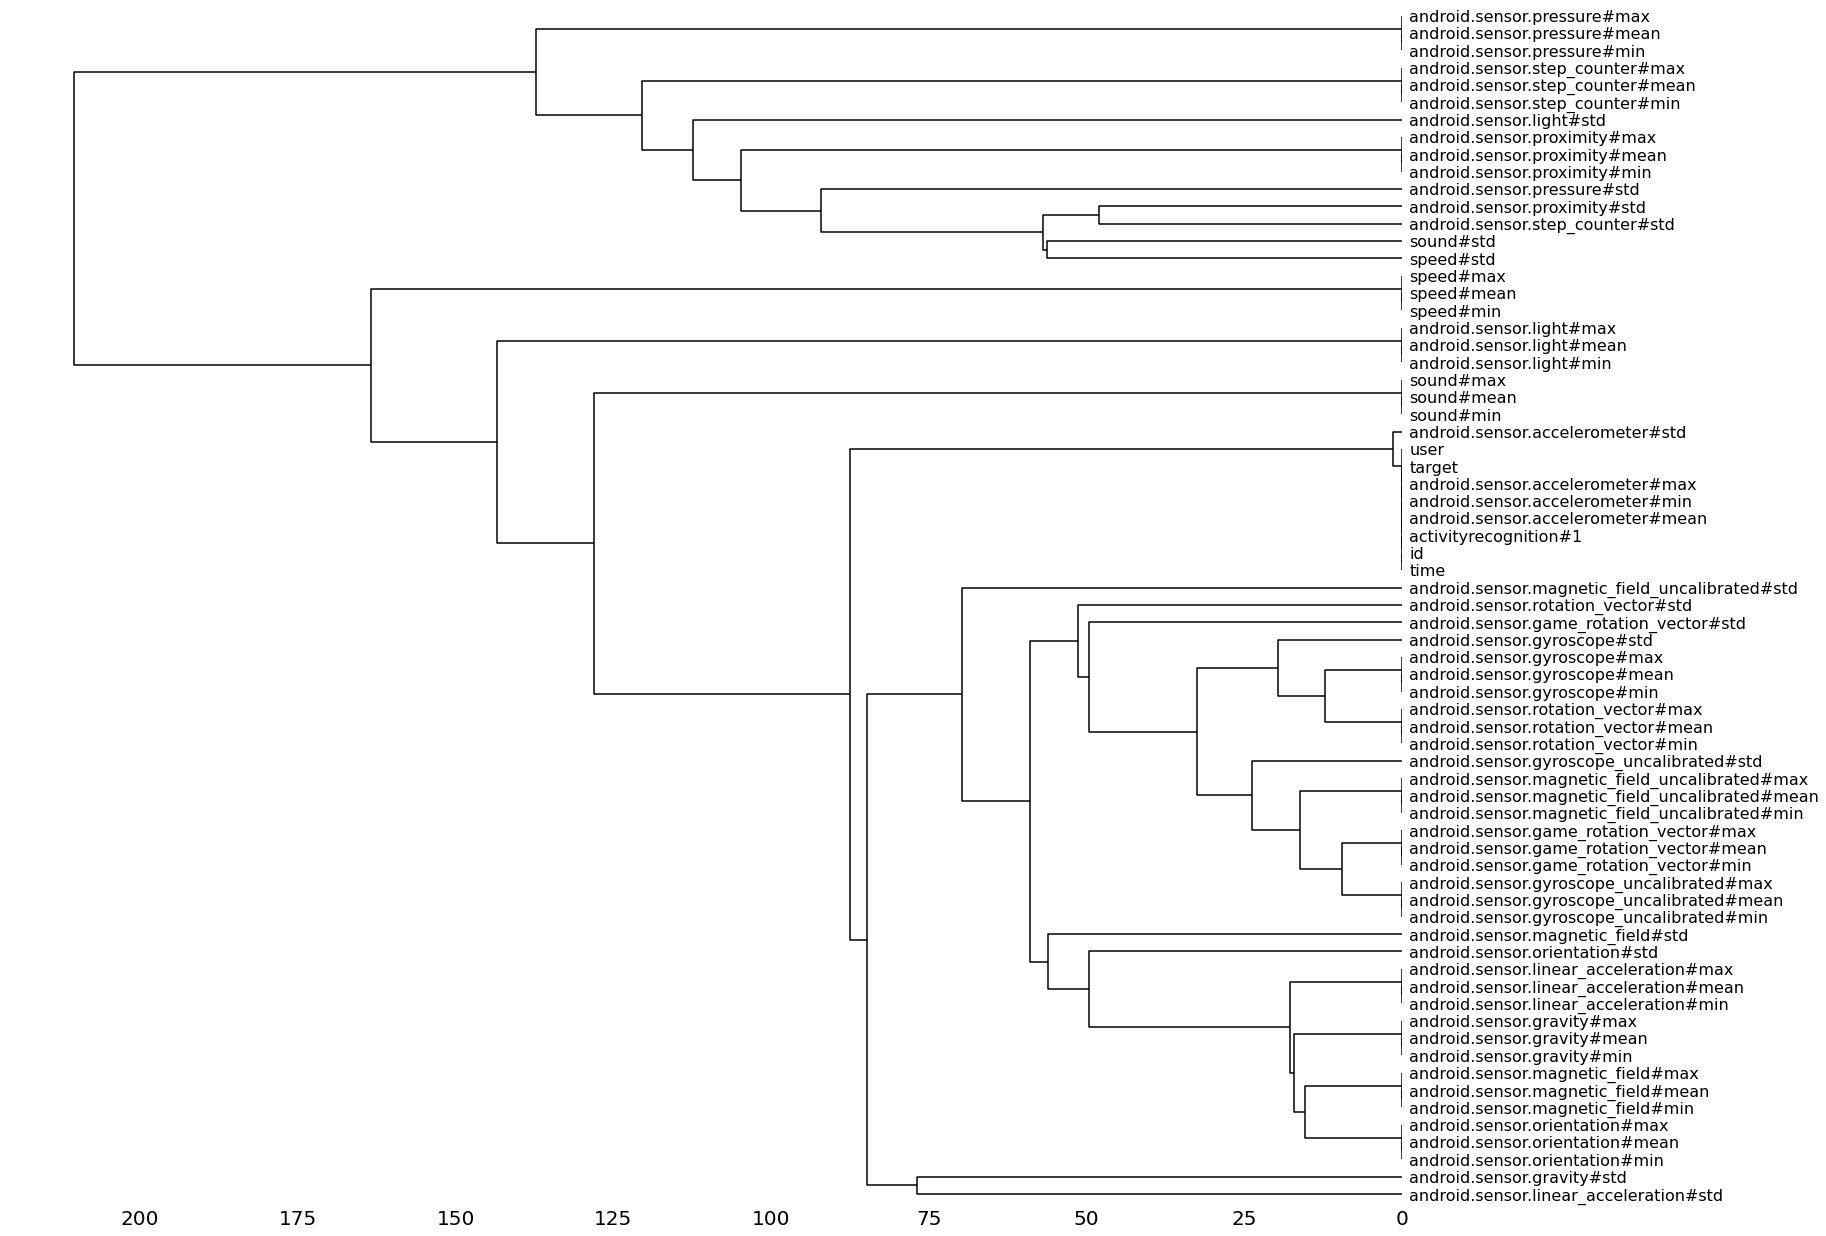

In [ ]:
import missingno as msno

msno.dendrogram(df)

# Sensors




![Picture title](image-20210517-143258.png)

In [ ]:
df.columns

Index(['id', 'time', 'activityrecognition#1',
       'android.sensor.accelerometer#mean', 'android.sensor.accelerometer#min',
       'android.sensor.accelerometer#max', 'android.sensor.accelerometer#std',
       'android.sensor.game_rotation_vector#mean',
       'android.sensor.game_rotation_vector#min',
       'android.sensor.game_rotation_vector#max',
       'android.sensor.game_rotation_vector#std',
       'android.sensor.gravity#mean', 'android.sensor.gravity#min',
       'android.sensor.gravity#max', 'android.sensor.gravity#std',
       'android.sensor.gyroscope#mean', 'android.sensor.gyroscope#min',
       'android.sensor.gyroscope#max', 'android.sensor.gyroscope#std',
       'android.sensor.gyroscope_uncalibrated#mean',
       'android.sensor.gyroscope_uncalibrated#min',
       'android.sensor.gyroscope_uncalibrated#max',
       'android.sensor.gyroscope_uncalibrated#std',
       'android.sensor.light#mean', 'android.sensor.light#min',
       'android.sensor.light#max', 'android

In [ ]:
df['is_walking'] = [1 if df['target'][i] == 4 else 0 for i in range(df.shape[0])]

df.head()

,id,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,...,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user,is_walking
0,156661,3.0,62.0,10.053802,4.328630,14.419712,2.359507,0.629076,0.436463,0.762086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,U12,0
1,156662,4.0,62.0,10.687402,6.373194,16.329818,2.912315,0.577839,0.376494,0.654833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,U12,0
2,156663,5.0,62.0,11.816800,4.817410,16.854629,3.199759,0.651511,0.585485,0.713222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,U12,0
3,156664,6.0,62.0,9.401312,6.124588,12.230792,1.572354,0.713226,0.693072,0.748520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,U12,0
4,156665,7.0,62.0,10.389851,5.313790,38.533453,5.426978,0.707375,0.684707,0.749263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,U12,0


In [ ]:
df['is_walking'].describe()

count    62585.000000
mean         0.200000
std          0.400003
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_walking, dtype: float64

In [ ]:
num_vars = ['android.sensor.accelerometer#mean', 'android.sensor.accelerometer#min', 'android.sensor.accelerometer#max', 'android.sensor.accelerometer#std',
    'android.sensor.gyroscope#mean', 'android.sensor.gyroscope#min', 'android.sensor.gyroscope#max', 'android.sensor.gyroscope#std', 'android.sensor.gyroscope_uncalibrated#mean',
    'android.sensor.gyroscope_uncalibrated#min', 'android.sensor.gyroscope_uncalibrated#max', 'android.sensor.gyroscope_uncalibrated#std',
    'sound#mean', 'sound#min', 'sound#max', 'sound#std'
]

In [ ]:
X = df[num_vars]

y = df['is_walking']

X.shape[0], y.shape[0]

(62585, 62585)

In [ ]:
import sklearn as skl
import time
from IPython.display import display, clear_output

from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config

set_config(display='diagram') # Useful for display the pipeline

In [ ]:
# num_4_treeModels = pipeline.Pipeline(steps=[
#   Some SimpleImputer here
#   ('imputer', impute.SimpleImputer(strategy='mean', add_indicator=True)), # mean, median
# ])

# cat_4_treeModels = pipeline.Pipeline(steps=[  
#   # No need to impute here (no missing values)
# #   ('imputer', impute.SimpleImputer(strategy='constant', fill_value='missing', add_indicator=True)),
#   # Some Encoder here. Remember to handle_unknown
#   ('ordinal', preprocessing.OrdinalEncoder(categories='auto', handle_unknown='use_encoded_value', unknown_value=-9999))
# ])

# tree_prepro = compose.ColumnTransformer(transformers=[
#     # ('num_t', num_4_treeModels, num_vars),
#     ('cat_t', cat_4_treeModels, cat_vars),
# ], remainder='drop') # Drop other vars not specified in num_vars or cat_vars

# tree_prepro

In [ ]:
from xgboost                import XGBClassifier
from lightgbm               import LGBMClassifier
from catboost               import CatBoostClassifier

In [ ]:
tree_classifiers = {
#   "Decision Tree": DecisionTreeRegressor(random_state=0),
#   "Extra Trees": ExtraTreesRegressor(n_estimators=200),
#   "Random Forest": RandomForestRegressor(n_estimators=200),
#   "AdaBoost": AdaBoostRegressor(n_estimators=200),
#   "Skl GBM": GradientBoostingRegressor(n_estimators=200),
#   "Skl HistGBM": HistGradientBoostingRegressor(random_state=0),
  "XGBoost": XGBClassifier(random_state=42),
  "LightGBM": LGBMClassifier(random_state=42),
  "CatBoost":CatBoostClassifier(random_state=42),
  }

tree_regressors = {name: pipeline.make_pipeline(model) for name, model in tree_classifiers.items()}

tree_regressors

{'XGBoost': Pipeline(steps=[('xgbclassifier',
                  XGBClassifier(base_score=None, booster=None,
                                colsample_bylevel=None, colsample_bynode=None,
                                colsample_bytree=None, gamma=None, gpu_id=None,
                                importance_type='gain',
                                interaction_constraints=None, learning_rate=None,
                                max_delta_step=None, max_depth=None,
                                min_child_weight=None, missing=nan,
                                monotone_constraints=None, n_estimators=100,
                                n_jobs=None, num_parallel_tree=None,
                                random_state=42, reg_alpha=None, reg_lambda=None,
                                scale_pos_weight=None, subsample=None,
                                tree_method=None, validate_parameters=None,
                                verbosity=None))]),
 'LightGBM': Pipeline(steps=[(

In [ ]:
X_train_validate, X_test, y_train_validate, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# Applying KFold
from sklearn.model_selection import cross_val_predict
skf = model_selection.StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

In [ ]:
results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})

for model_name, model in tree_classifiers.items():
    start_time = time.time()

    preds = cross_val_predict(model, X_train_validate, y_train_validate, cv=skf, n_jobs=-1)

    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_train_validate, preds)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_train_validate, preds)*100,
                              "Time":     total_time},
                              ignore_index=True)




results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

,Model,Accuracy,Bal Acc.,Time
1,XGBoost,97.205800,94.957588,199.751168
2,CatBoost,96.932172,94.368388,213.877946
3,LightGBM,96.644563,94.064454,8.507004


In [ ]:
xgboost = tree_classifiers['XGBoost']

xgboost.fit(X_train_validate, y_train_validate)

wild_preds = xgboost.predict(X_test)

wild_acc = metrics.accuracy_score(y_test, wild_preds)*100

wild_bal_acc = metrics.balanced_accuracy_score(y_test, wild_preds)*100

/root/venv/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[13:58:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
print(wild_acc,wild_bal_acc)

97.05999840217304 95.00060452372661


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,wild_preds)

array([[9816,  152],
       [ 216, 2333]])

In [ ]:
import optuna as opt

In [ ]:
def objective(trial):

    # Defining hyperparameters
    booster            = trial.suggest_categorical('booster', ['gbtree', 'dart'])
    eta                = trial.suggest_categorical('eta', [0.3, 0.03, 0.003])
    gamma              = trial.suggest_float('gamma', 0, 1000)
    max_depth          = trial.suggest_int('max_depth', 3, 10)
    num_parallel_tree  = trial.suggest_int('num_parallel_tree', 1, 10)
    
    # Model

    model = XGBClassifier(random_state=42)

    # pipe = pipeline.Pipeline(steps=[('prepro', mult_prepro), ('model', model)])

    # train the model

    oof_preds = model_selection.cross_val_predict(model, X, y, cv=skf)

    accuracy = metrics.balanced_accuracy_score(y, oof_preds)

    return accuracy

study = opt.create_study(direction='maximize')

study.optimize(objective, n_trials=100)

[I 2021-05-17 14:41:09,356] A new study created in memory with name: no-name-7548267c-7eaf-447a-baf8-11eb223de0a0
/root/venv/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[14:41:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
/root/venv/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove 

KernelInterrupted: Execution interrupted by the Jupyter kernel.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0ab5774e-4180-4d43-8769-bd8c6c46e9ed' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>